<a href="https://colab.research.google.com/github/Emelyanova-S/pop/blob/master/Laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # для построения графиков

In [0]:
url = "https://drive.google.com/uc?export=download&id=18DPkDvWDhNEa2-j3XoQHk05o5NxXm1bz"
df_power = pd.read_excel(url)

df_power2=df_power.copy()

df_power

,date_stamp,production
0,01.01.2013,103256.7
1,01.02.2013,91532.6
2,01.03.2013,97809.1
3,01.04.2013,85131.0
4,01.05.2013,79080.8
...,...,...
79,01.08.2019,83100.0
80,01.09.2019,84000.0
81,01.10.2019,93200.0
82,01.11.2019,98900.0


In [0]:
df_power = df_power.sort_values(['production'], ascending = False)
print(df_power)

    date_stamp  production
71  01.12.2018    107520.0
47  01.12.2016    106081.4
72  01.01.2019    105700.0
83  01.12.2019    104400.0
36  01.01.2016    104243.7
..         ...         ...
18  01.07.2014     76271.2
6   01.07.2013     76095.4
29  01.06.2015     74737.5
5   01.06.2013     74479.9
17  01.06.2014     73962.5

[84 rows x 2 columns]


In [0]:
df_power2

,date_stamp,production
0,01.01.2013,103256.7
1,01.02.2013,91532.6
2,01.03.2013,97809.1
3,01.04.2013,85131.0
4,01.05.2013,79080.8
...,...,...
79,01.08.2019,83100.0
80,01.09.2019,84000.0
81,01.10.2019,93200.0
82,01.11.2019,98900.0


In [0]:
df_power2['approximate_month_production'] = df_power2['production'] * 30
df_power2

,date_stamp,production,approximate_month_production
0,01.01.2013,103256.7,3097701.0
1,01.02.2013,91532.6,2745978.0
2,01.03.2013,97809.1,2934273.0
3,01.04.2013,85131.0,2553930.0
4,01.05.2013,79080.8,2372424.0
...,...,...,...
79,01.08.2019,83100.0,2493000.0
80,01.09.2019,84000.0,2520000.0
81,01.10.2019,93200.0,2796000.0
82,01.11.2019,98900.0,2967000.0


In [0]:
df_power2['Year'] = np.where(df_power2['date_stamp'].str.find('2013') >= 0, '2013', np.where(df_power2['date_stamp'].str.find('2014') >= 0, '2014', np.where(df_power2['date_stamp'].str.find('2015') >= 0, '2015', np.where(df_power2['date_stamp'].str.find('2016') >= 0, '2016', np.where(df_power2['date_stamp'].str.find('2017') >= 0, '2017', np.where(df_power2['date_stamp'].str.find('2018') >= 0, '2018', np.where(df_power2['date_stamp'].str.find('2019') >= 0, '2019', '?')))))))
df_power2

,date_stamp,production,approximate_month_production,Year
0,01.01.2013,103256.7,3097701.0,2013
1,01.02.2013,91532.6,2745978.0,2013
2,01.03.2013,97809.1,2934273.0,2013
3,01.04.2013,85131.0,2553930.0,2013
4,01.05.2013,79080.8,2372424.0,2013
...,...,...,...,...
79,01.08.2019,83100.0,2493000.0,2019
80,01.09.2019,84000.0,2520000.0,2019
81,01.10.2019,93200.0,2796000.0,2019
82,01.11.2019,98900.0,2967000.0,2019


In [0]:
print('данные из десятой строки и второго столбца')
print(df_power2.iloc[9 , 1])

данные из десятой строки и второго столбца
90408.8


In [0]:
print(df_power2.groupby(['Year'])['production'].max())

Year
2013    103256.7
2014    103343.5
2015    101681.9
2016    106081.4
2017    104178.5
2018    107520.0
2019    105700.0
Name: production, dtype: float64


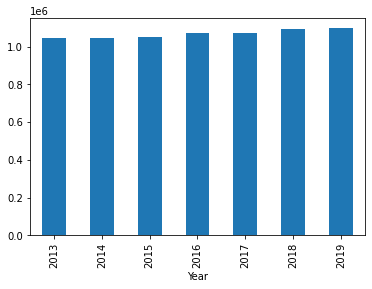

In [0]:
df_power2.groupby(['Year'])['production'].sum().plot(kind = 'bar')

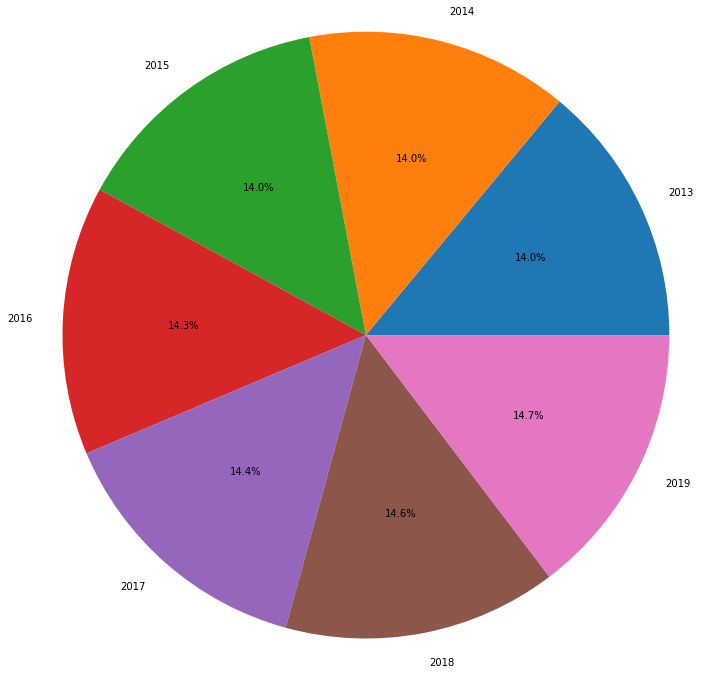

In [0]:
generation_sum = (df_power2.groupby(['Year'])['production']).sum()

labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']

fig1, ax1 = plt.subplots(figsize = (12, 12))
ax1.pie(generation_sum, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [0]:
from bokeh.plotting import figure, show

In [0]:
p = figure(plot_width = 800, plot_height = 400)

# Список цветов по количеству лет.
colors = ['magenta', 'red', 'yellow', 'green', 'cyan', 'blue', 'black']

# Для каждого года свой график.
for year in range(2013, 2020):

  # Выбор из таблицы данных по выработке за нужный год. 
  values = df_power2[df_power2['Year'] == year]['production'].values
  
  # Построение линий.
  p.line(np.arange(12), values, color = colors[year - 2013], legend_label = str(year), line_width = 3)

  # Построение маркеров.
  p.circle(np.arange(12), values, color = colors[year - 2013], alpha=0.5, size = 8)


show(p)